In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/gdrive/MyDrive/Dataset/100-nodes-ML.csv')

In [ ]:
data.head()

,CPU-Utilization,Memory-Usage,rank
0,0.0000,8.8201,54.0
1,0.0000,12.7370,82.0
2,0.0000,12.1410,76.0
3,1.0062,7.3122,39.0
4,0.0000,8.1250,47.0


In [ ]:
x = data.drop('rank',axis=1)
y = data['rank']

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state =1) 

In [ ]:
model = XGBRegressor(learning_rate=0.1, n_estimators= 100)

In [ ]:
model.fit(x_train, y_train)

[00:54:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

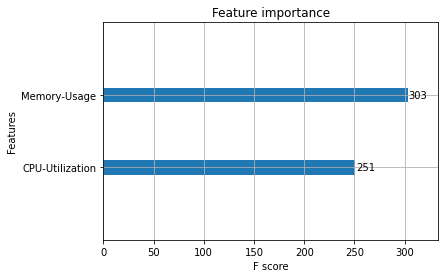

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
xgb.plot_importance(model, ax=plt.gca())

In [ ]:
predictions = model.predict(x_test)

In [ ]:
pred_train = model.predict(x_train)

In [ ]:
pred_train

array([97.04733  , 97.26457  , 50.1553   , 35.461082 , 87.67305  ,
       65.50734  , 93.3031   , 32.775787 , 73.87672  , 56.46529  ,
       95.79801  , 60.290497 , 19.078646 , 81.646324 , 59.86126  ,
       24.410244 , 33.80372  , 31.423439 ,  7.1483226, 25.523687 ,
       66.45436  , 45.07865  , 40.61093  , 61.958256 , 61.1633   ,
       50.6681   , 27.411512 , 51.449368 , 47.375    , 86.855965 ,
       13.500269 , 65.964966 , 99.36635  , 38.35417  , 44.42106  ,
       36.723717 , 33.975353 , 90.86235  , 66.30079  , 37.3726   ,
       41.70727  , 69.23236  , 27.38709  , 52.565247 , 84.87524  ,
       22.657408 , 31.152624 ,  9.77714  ,  4.8662415, 45.71275  ,
       77.6456   ,  1.9366698, 88.758835 , 93.24943  , 17.663616 ,
       88.47578  , 51.65025  ,  6.532533 , 24.258986 ,  3.8300643,
       28.102676 , 59.583633 , 38.456993 , 82.37724  , 76.6851   ,
       82.432076 , 22.52987  ,  7.391706 , 13.468786 , 56.9852   ,
       98.15917  , 86.844986 , 73.19734  ,  9.934043 , 83.9250

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  ## use function score   RMSE

In [ ]:
print( r2_score(y_train, pred_train) ) # how much variance the model explains?

0.9984730458168054


In [ ]:
print( mean_squared_error(y_train, pred_train) )  ##  lower -> better ??

1.251764057172577


In [ ]:
print( mean_absolute_error(y_train, pred_train) )

0.8811128679911295


In [ ]:
model.score(x_test, y_test)  ## R^2

0.9788072204999198

In [ ]:
print(r2_score(y_test, predictions))

0.9788072204999198


In [ ]:
print(mean_squared_error(y_test, predictions))

18.280586420744456


In [ ]:
print(mean_absolute_error(y_test, predictions))

3.3663515853881836


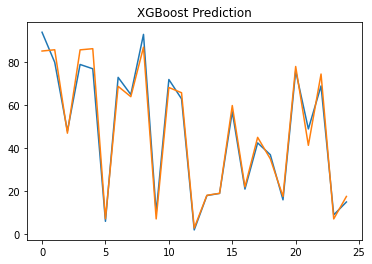

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax,y_test, label="original")
plt.plot(x_ax, predictions, label= "predicted")
plt.title("XGBoost Prediction")
plt.legend
plt.show()

In [ ]:
data2= pd.read_csv('/content/gdrive/MyDrive/Dataset/30-nodes-ML.csv')

In [ ]:
data2.head()

,CPU-Utilization,Memory-Usage,rank
0,0.0000,8.8201,54
1,0.0000,12.7370,82
2,0.0000,12.1410,76
3,1.0062,7.3122,39
4,0.0000,8.1250,47


In [ ]:
x2 = data2.drop('rank',axis=1)
y2 = data2['rank']

In [ ]:
x_test_top30 = x2
y_test_top30 = y2 

In [ ]:
predictions = model.predict(x_test_top30)

In [ ]:
model.score(x_test_top30, y_test_top30) 

0.9977593753004841

In [ ]:
print(r2_score(y_test_top30, predictions))

0.9977593753004841


In [ ]:
print(mean_squared_error(y_test_top30, predictions))

1.6484126539358916


In [ ]:
print(mean_absolute_error(y_test_top30, predictions))

0.9871708393096924


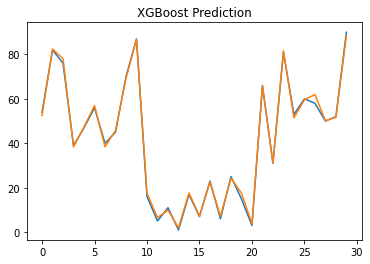

In [ ]:
x_ax_top30 = range(len(y_test_top30))
plt.plot(x_ax_top30,y_test_top30, label="original")
plt.plot(x_ax_top30, predictions, label= "predicted")
plt.title("XGBoost Prediction")
plt.legend
plt.show()